In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/text_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/text_classification


In [0]:
from pandas import read_csv
df = read_csv('processedDataset.csv',names=['text','target'],error_bad_lines=False,encoding='utf-8')
df = df.dropna()

In [0]:
from sklearn import model_selection
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text'],df['target'],test_size=0.25,random_state=101)

In [0]:
import pickle
import pandas as pd

def classification_nb(input_text):
    nb_model = pickle.load(open('models/naive_bayes_model.sav', 'rb'))
    tfidf_model = pickle.load(open('models/tfidf_model.sav', 'rb'))
    tfidf_text = tfidf_model.transform(input_text)
    label = nb_model.predict(tfidf_text)
    return label

def classification_svm(input_text):
    svm_model = pickle.load(open('models/svm_model.sav', 'rb'))
    tfidf_model = pickle.load(open('models/tfidf_model.sav', 'rb'))
    tfidf_text = tfidf_model.transform(input_text)
    label = svm_model.predict(tfidf_text)
    return label



In [0]:
from keras.preprocessing import sequence
from keras.models import load_model
import numpy as np
def classification_cnn(input_text):
    tok = pickle.load(open('models/tokenizer_cnn.pickle', 'rb'))
    cnn_model = load_model('models/cnn_model.h5')
    test_sequences = tok.texts_to_sequences(input_text)
    test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=150)
    label = cnn_model.predict(test_sequences_matrix,batch_size=32,verbose = 2)
    return label

def classification_lstm(input_text):
    tok = pickle.load(open('models/tokenizer_lstm.pickle', 'rb'))
    lstm_model = load_model('models/lstm_model.h5')
    test_sequences = tok.texts_to_sequences(input_text)
    test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=150)
    label = lstm_model.predict(test_sequences_matrix,batch_size=32,verbose = 2)
    return label

In [36]:
y_hat_lstm,y_hat_cnn =[],[]
for i in classification_lstm(Test_X):
  y_hat_lstm = np.append(y_hat_lstm,np.argmax(i))

for n in classification_cnn(Test_X):
  y_hat_cnn = np.append(y_hat_cnn,np.argmax(n))

print (y_hat_lstm)
print (y_hat_cnn)

[4. 1. 1. ... 1. 3. 3.]
[4. 1. 1. ... 1. 3. 0.]


In [0]:
print (Test_Y)

In [37]:
from sklearn.metrics import precision_recall_fscore_support

precision_nb,recall_nb,f1_macro_nb,_ = precision_recall_fscore_support(Test_Y.as_matrix(),classification_nb(Test_X),average='macro')
precision_svm,recall_svm,f1_macro_svm,_ = precision_recall_fscore_support(Test_Y.as_matrix(),classification_svm(Test_X),average='macro')
precision_cnn,recall_cnn,f1_macro_cnn,_ = precision_recall_fscore_support(Test_Y.as_matrix(),y_hat_cnn,average='macro')
precision_lstm,recall_lstm,f1_macro_lstm,_ = precision_recall_fscore_support(Test_Y.as_matrix(),y_hat_lstm,average='macro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


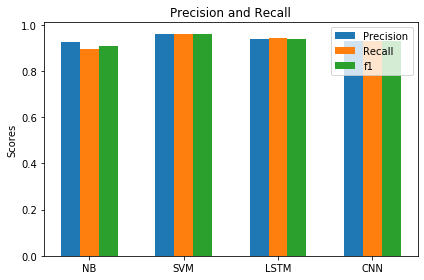

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['NB', 'SVM', 'LSTM', 'CNN']
bar1 = [precision_nb, precision_svm,precision_cnn,precision_lstm]
bar2 = [recall_nb, recall_svm,recall_cnn,recall_lstm]
bar3 = [f1_macro_nb, f1_macro_svm,f1_macro_cnn,f1_macro_lstm]

x = np.arange(len(labels))  
width = 0.2 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bar1, width, label='Precision')
rects2 = ax.bar(x, bar2, width, label='Recall')
rects3 = ax.bar(x + width, bar3, width, label='f1')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()